#  <span style="color:#3366ff"> <strong> Tags Proposal </strong>

#  <span style="color:#3366ff"> <strong> 20180920 Part 3 Cleaned

<span style="color:#3366ff"> This notebook is dedicated to the supervised & unsupervised (LDA) comparison.

### Librairies Import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn import preprocessing, decomposition, cluster, metrics, neighbors
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.neural_network import MLPClassifier

import nltk
from nltk.tokenize import word_tokenize

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

from collections import Counter
import string
import re

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Database loading

In [2]:
data_text = pd.read_csv(
    'DATA_clean/20180924_data_Text.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

data_test = pd.read_csv(
    'DATA_clean/20180924_data_Text_test.csv', 
    #sep='\t', 
    index_col=0,
    encoding='utf-8', 
    low_memory = False)

pd.options.display.max_columns=999
data_text.head(15)

,Text_OK,Tags_OK
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...
1,absolutely positioned div containing several c...,html css css3 internet-explorer-7
2,given datetime representing person birthday ca...,c# .net datetime
3,given specific datetime value display relative...,c# datetime time datediff relative-time-s...
4,standard way web server able determine user ti...,javascript html browser timezone timezone...
5,difference math floor truncate net,.net math
6,expose linq query asmx web service usually bus...,c# linq web-services .net-3.5
7,store binary data mysql,mysql database binary-data data-storage
8,looking fastest way obtain value personal chal...,performance algorithm language-agnostic un...
9,trigger update table throw error prevents mysql,mysql database triggers


In [3]:
shapetest = data_text.shape

print("This SAMPLED database contains",shapetest[0], 
      "questions/titles.")

This SAMPLED database contains 8000 questions/titles.


In [4]:
data_test = data_test.reset_index()
data_test = data_test.filter(items=(['Text_OK','Tags_OK']))
data_test.head()

,Text_OK,Tags_OK
0,biggest concern ease use nothing beats google ...,project-management scheduling project-plann...
1,recently installed windows server replace cras...,iis iis-7 asp-classic
2,gnuplot docs say fonts five basic supported di...,gnuplot
3,security manager dynamically inserts bit javas...,html doctype
4,need good cms supports data clustering managin...,content-management-system cluster-computing


## <span style="color:#6600cc">  "X Text":  Tok and counting --> Frequency

In [5]:
count_vect = CountVectorizer(max_features = 400,
                            max_df=1300,
                            min_df=150)

X_text_counts = count_vect.fit_transform(data_text["Text_OK"])
X_text_counts.shape

(8000, 400)

In [6]:
X_f = pd.DataFrame(X_text_counts.toarray(), columns = [count_vect.get_feature_names()])

In [7]:
X_f.shape

print("This table contains", X_f.shape[0],
      "lines described with",X_f.shape[1],
      "words (present or not)")

This table contains 8000 lines described with 400 words (present or not)


In [8]:
X_f.head(10)

,able,access,across,actually,add,added,adding,allow,already,also,always,another,answer,answers,anybody,anyone,anything,api,app,application,applications,approach,around,array,asp,automatically,available,avoid,back,base,based,basic,basically,best,better,bit,box,browser,build,building,built,button,call,called,calls,case,certain,change,changes,check,class,classes,click,client,column,com,come,command,common,company,contains,content,control,controls,convert,copy,correct,could,create,created,creating,css,current,currently,custom,data,database,db,default,design,determine,developer,development,difference,different,directory,display,document,done,easily,easy,edit,either,else,end,enough,environment,error,etc,even,event,every,everything,example,examples,exception,existing,experience,far,field,figure,file,files,find,fine,first,following,foo,form,format,forms,found,framework,free,full,function,functionality,functions,general,generate,gets,getting,give,given,go,going,good,google,got,great,handle,hard,help,however,html,http,id,idea,ideas,ie,image,implement,include,information,input,inside,installed,instance,instead,int,interested,interface,issue,issues,items,java,javascript,keep,key,kind,language,large,last,least,let,level,libraries,library,line,link,linux,list,little,load,local,log,long,look,looking,looks,lot,machine,made,main,make,makes,making,many,may,maybe,mean,means,memory,message,method,methods,microsoft,might,missing,ms,much,multiple,must,mysql,name,needed,needs,never,new,next,nice,non,note,null,number,object,objects,obviously,ok,old,open,option,options,order,os,output,page,pages,part,particular,path,people,performance,php,place,platform,please,point,possible,post,pretty,private,probably,problem,problems,process,program,programming,project,projects,properties,property,provide,public,put,python,query,question,quite,rather,read,reading,real,really,reason,recently,reference,remove,request,result,results,return,right,run,running,say,script,search,second,see,seem,seems,seen,select,send,server,service,set,setting,setup,several,show,side,similar,simple,simply,since,single,site,size,small,software,solution,solutions,someone,something,sort,source,specific,specifically,sql,standard,start,started,static,still,store,stored,string,structure,studio,stuff,suggestions,support,sure,system,table,tables,take,tell,test,testing,text,thanks,thing,things,think,thinking,though,thought,time,times,tool,tools,tried,true,try,trying,two,type,types,understand,update,url,us,used,useful,user,users,uses,value,values,variable,various,vb,version,via,view,visual,void,vs,ways,web,website,well,whether,window,windows,within,without,wondering,work,working,works,write,writing,written,wrong,xml,yet
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

<span style="color:#3366ff"> X_f = Text  Frequency

In [9]:
X_f.describe()

,able,access,across,actually,add,added,adding,allow,already,also,always,another,answer,answers,anybody,anyone,anything,api,app,application,applications,approach,around,array,asp,automatically,available,avoid,back,base,based,basic,basically,best,better,bit,box,browser,build,building,built,button,call,called,calls,case,certain,change,changes,check,class,classes,click,client,column,com,come,command,common,company,contains,content,control,controls,convert,copy,correct,could,create,created,creating,css,current,currently,custom,data,database,db,default,design,determine,developer,development,difference,different,directory,display,document,done,easily,easy,edit,either,else,end,enough,environment,error,etc,even,event,every,everything,example,examples,exception,existing,experience,far,field,figure,file,files,find,fine,first,following,foo,form,format,forms,found,framework,free,full,function,functionality,functions,general,generate,gets,getting,give,given,go,going,good,google,got,great,handle,hard,help,however,html,http,id,idea,ideas,ie,image,implement,include,information,input,inside,installed,instance,instead,int,interested,interface,issue,issues,items,java,javascript,keep,key,kind,language,large,last,least,let,level,libraries,library,line,link,linux,list,little,load,local,log,long,look,looking,looks,lot,machine,made,main,make,makes,making,many,may,maybe,mean,means,memory,message,method,methods,microsoft,might,missing,ms,much,multiple,must,mysql,name,needed,needs,never,new,next,nice,non,note,null,number,object,objects,obviously,ok,old,open,option,options,order,os,output,page,pages,part,particular,path,people,performance,php,place,platform,please,point,possible,post,pretty,private,probably,problem,problems,process,program,programming,project,projects,properties,property,provide,public,put,python,query,question,quite,rather,read,reading,real,really,reason,recently,reference,remove,request,result,results,return,right,run,running,say,script,search,second,see,seem,seems,seen,select,send,server,service,set,setting,setup,several,show,side,similar,simple,simply,since,single,site,size,small,software,solution,solutions,someone,something,sort,source,specific,specifically,sql,standard,start,started,static,still,store,stored,string,structure,studio,stuff,suggestions,support,sure,system,table,tables,take,tell,test,testing,text,thanks,thing,things,think,thinking,though,thought,time,times,tool,tools,tried,true,try,trying,two,type,types,understand,update,url,us,used,useful,user,users,uses,value,values,variable,various,vb,version,via,view,visual,void,vs,ways,web,website,well,whether,window,windows,within,without,wondering,work,working,works,write,writing,written,wrong,xml,yet
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.0000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.0

## <span style="color:#6600cc"> X "Text" Term Frequency-Inverse Document Frequency --> TF-IDF

In [10]:
tfidf = TfidfVectorizer(max_features = 400, 
                        max_df = 1300,
                        min_df = 150)
values_X_tfidf = tfidf.fit_transform(data_text['Text_OK'])

X_tfidf = pd.DataFrame(values_X_tfidf.toarray(), columns = [tfidf.get_feature_names()])
X_tfidf.head()

,able,access,across,actually,add,added,adding,allow,already,also,always,another,answer,answers,anybody,anyone,anything,api,app,application,applications,approach,around,array,asp,automatically,available,avoid,back,base,based,basic,basically,best,better,bit,box,browser,build,building,built,button,call,called,calls,case,certain,change,changes,check,class,classes,click,client,column,com,come,command,common,company,contains,content,control,controls,convert,copy,correct,could,create,created,creating,css,current,currently,custom,data,database,db,default,design,determine,developer,development,difference,different,directory,display,document,done,easily,easy,edit,either,else,end,enough,environment,error,etc,even,event,every,everything,example,examples,exception,existing,experience,far,field,figure,file,files,find,fine,first,following,foo,form,format,forms,found,framework,free,full,function,functionality,functions,general,generate,gets,getting,give,given,go,going,good,google,got,great,handle,hard,help,however,html,http,id,idea,ideas,ie,image,implement,include,information,input,inside,installed,instance,instead,int,interested,interface,issue,issues,items,java,javascript,keep,key,kind,language,large,last,least,let,level,libraries,library,line,link,linux,list,little,load,local,log,long,look,looking,looks,lot,machine,made,main,make,makes,making,many,may,maybe,mean,means,memory,message,method,methods,microsoft,might,missing,ms,much,multiple,must,mysql,name,needed,needs,never,new,next,nice,non,note,null,number,object,objects,obviously,ok,old,open,option,options,order,os,output,page,pages,part,particular,path,people,performance,php,place,platform,please,point,possible,post,pretty,private,probably,problem,problems,process,program,programming,project,projects,properties,property,provide,public,put,python,query,question,quite,rather,read,reading,real,really,reason,recently,reference,remove,request,result,results,return,right,run,running,say,script,search,second,see,seem,seems,seen,select,send,server,service,set,setting,setup,several,show,side,similar,simple,simply,since,single,site,size,small,software,solution,solutions,someone,something,sort,source,specific,specifically,sql,standard,start,started,static,still,store,stored,string,structure,studio,stuff,suggestions,support,sure,system,table,tables,take,tell,test,testing,text,thanks,thing,things,think,thinking,though,thought,time,times,tool,tools,tried,true,try,trying,two,type,types,understand,update,url,us,used,useful,user,users,uses,value,values,variable,various,vb,version,via,view,visual,void,vs,ways,web,website,well,whether,window,windows,within,without,wondering,work,working,works,write,writing,written,wrong,xml,yet
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.193928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.262724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244985,0.0,0.312589,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.244868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.280615,0.0,0.241001,0.0,0.275448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.233675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0

<span style="color:#3366ff"> X_tfidf = Term Frequency-Inverse Document Frequency applied to "Text" 

## <span style="color:#6600cc"> "y Tags" Frequency

### CountVectorizer --> y_f

In [11]:
count_vect2 = CountVectorizer(max_features = 100,
                              min_df = 80)

y_tag_counts = count_vect2.fit_transform(data_text['Tags_OK'])

y_f = y_tag_counts.toarray()
y_f = pd.DataFrame(y_tag_counts.toarray(), columns = [count_vect2.get_feature_names()])
y_f.shape

print("There are",y_f.shape[1],
      "tags.")

There are 53 tags.


In [12]:
y_f.head()

,2005,2008,agnostic,ajax,algorithm,asp,control,css,data,database,design,file,html,iis,interface,java,javascript,jquery,language,linq,linux,macos,multithreading,mvc,mysql,net,on,oop,oracle,performance,php,python,rails,regex,ruby,security,server,services,sql,string,studio,svn,testing,unit,user,vb,version,visual,web,windows,winforms,wpf,xml
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
Tags_OK_Freq = y_f.columns.levels
Tags_OK_Freq = Tags_OK_Freq[0] 
Tags_OK_Freq

Index(['2005', '2008', 'agnostic', 'ajax', 'algorithm', 'asp', 'control',
       'css', 'data', 'database', 'design', 'file', 'html', 'iis', 'interface',
       'java', 'javascript', 'jquery', 'language', 'linq', 'linux', 'macos',
       'multithreading', 'mvc', 'mysql', 'net', 'on', 'oop', 'oracle',
       'performance', 'php', 'python', 'rails', 'regex', 'ruby', 'security',
       'server', 'services', 'sql', 'string', 'studio', 'svn', 'testing',
       'unit', 'user', 'vb', 'version', 'visual', 'web', 'windows', 'winforms',
       'wpf', 'xml'],
      dtype='object')

In [14]:
def tok(x):
    kkk = word_tokenize(x)
    ttt = [w for w in kkk if w in Tags_OK_Freq]
    return ttt

In [15]:
data = [" ".join(tok(x)) for x in data_text['Tags_OK'] ]
data_t = pd.DataFrame(data, columns = ['Tags_OK_Freq'])
data_text = pd.concat([data_text, data_t['Tags_OK_Freq']], axis = 1)
data_text.head(10)

,Text_OK,Tags_OK,Tags_OK_Freq
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...,
1,absolutely positioned div containing several c...,html css css3 internet-explorer-7,html css
2,given datetime representing person birthday ca...,c# .net datetime,
3,given specific datetime value display relative...,c# datetime time datediff relative-time-s...,
4,standard way web server able determine user ti...,javascript html browser timezone timezone...,javascript html
5,difference math floor truncate net,.net math,
6,expose linq query asmx web service usually bus...,c# linq web-services .net-3.5,linq
7,store binary data mysql,mysql database binary-data data-storage,mysql database
8,looking fastest way obtain value personal chal...,performance algorithm language-agnostic un...,performance algorithm
9,trigger update table throw error prevents mysql,mysql database triggers,mysql database


<span style="color:#3366ff"> y_f = tags Frequency

## <span style="color:#6600cc"> "y Tags" TF IDF

In [16]:
tfidf2 = TfidfVectorizer(max_features = 100,
                         min_df = 80)
values_y_tfidf2 = tfidf2.fit_transform(data_text['Tags_OK'])

y_tfidf = pd.DataFrame(values_y_tfidf2.toarray(), columns = [tfidf2.get_feature_names()])
y_tfidf.head()

,2005,2008,agnostic,ajax,algorithm,asp,control,css,data,database,design,file,html,iis,interface,java,javascript,jquery,language,linq,linux,macos,multithreading,mvc,mysql,net,on,oop,oracle,performance,php,python,rails,regex,ruby,security,server,services,sql,string,studio,svn,testing,unit,user,vb,version,visual,web,windows,winforms,wpf,xml
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.736021,0.0,0.0,0.0,0.0,0.676959,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.743659,0.0,0.0,0.0,0.668559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
y_tfidf.shape

(8000, 53)

In [18]:
y_tfidf.tail()

,2005,2008,agnostic,ajax,algorithm,asp,control,css,data,database,design,file,html,iis,interface,java,javascript,jquery,language,linq,linux,macos,multithreading,mvc,mysql,net,on,oop,oracle,performance,php,python,rails,regex,ruby,security,server,services,sql,string,studio,svn,testing,unit,user,vb,version,visual,web,windows,winforms,wpf,xml
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35644,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.67486,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.646154,0.000000,0.000000,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.620763,0.783999,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.952436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.304738,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.714879,0.0,0.0,0.0,0.0,0.0,0.0,0.699248,0.000000,0.000000,0.000000,0.0,0.0
7999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


<span style="color:#3366ff"> y_tfidf = Term Frequency-Inverse Document Frequency applied to "Tags" 

# <span style="color:#6600cc"> X Clustering

## 1) Clustering to determine "X clusters" based on "text" Frequency

### X Freq preprocessing

In [19]:
scaler_tags_x_f = preprocessing.StandardScaler().fit(X_f)
X_f_scaled = scaler_tags_x_f.transform(X_f) 

### Best Clustering X freq

In [20]:
cls_cah_X_f = cluster.AgglomerativeClustering(n_clusters=10, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )

In [21]:
cls_cah_X_f.fit(X_f_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func=<function mean at 0x7fdf04073ae8>)

In [22]:
X_f_clus_cah = cls_cah_X_f.labels_
X_f_clus_cah

array([0, 9, 2, ..., 0, 1, 0])

In [23]:
data_text['X Freq Cluster'] = X_f_clus_cah
data_text.head()

,Text_OK,Tags_OK,Tags_OK_Freq,X Freq Cluster
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...,,0
1,absolutely positioned div containing several c...,html css css3 internet-explorer-7,html css,9
2,given datetime representing person birthday ca...,c# .net datetime,,2
3,given specific datetime value display relative...,c# datetime time datediff relative-time-s...,,2
4,standard way web server able determine user ti...,javascript html browser timezone timezone...,javascript html,2


## 2) Clustering to determine "X clusters" based on "text" TFIDF

### X TFIDF preprocessing

In [24]:
scaler_tags_x_tfidf = preprocessing.StandardScaler().fit(X_tfidf)
X_tfidf_scaled = scaler_tags_x_tfidf.transform(X_tfidf) 

### Best Clustering X text TFIDF

In [25]:
cls_cah_X_tfidf = cluster.AgglomerativeClustering(n_clusters=10, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )

cls_cah_X_tfidf.fit(X_tfidf_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func=<function mean at 0x7fdf04073ae8>)

In [26]:
X_tfidf_clus_cah = cls_cah_X_tfidf.labels_
X_tfidf_clus_cah

array([6, 6, 6, ..., 6, 0, 0])

In [27]:
data_text['X TFIDF Cluster'] = X_tfidf_clus_cah
data_text.head()

,Text_OK,Tags_OK,Tags_OK_Freq,X Freq Cluster,X TFIDF Cluster
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...,,0,6
1,absolutely positioned div containing several c...,html css css3 internet-explorer-7,html css,9,6
2,given datetime representing person birthday ca...,c# .net datetime,,2,6
3,given specific datetime value display relative...,c# datetime time datediff relative-time-s...,,2,1
4,standard way web server able determine user ti...,javascript html browser timezone timezone...,javascript html,2,6


# <span style="color:#6600cc"> y Clustering

## 1) Clustering to determine "y clusters" based on "tags" Frequency

### y Freq preprocessing

In [28]:
scaler_tags = preprocessing.StandardScaler().fit(y_f)
y_scaled = scaler_tags.transform(y_f) 

<strong> CAH on "tags" Frequency

In [29]:
calinski = []
silhouettes = [] 

for num_cluster in range(10,80, 10):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(y_scaled)
    cali = metrics.calinski_harabaz_score(y_scaled, cls_cah.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(y_scaled, cls_cah.labels_)
    silhouettes.append(silh)    

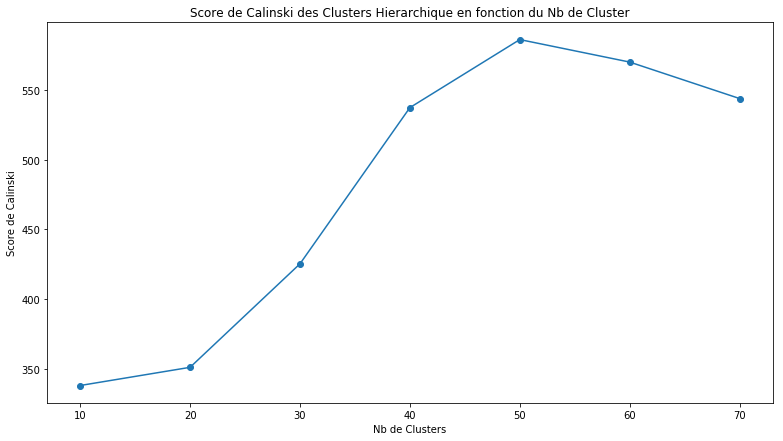

In [30]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski des Clusters Hierarchique en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

plt.plot(range(10,80, 10), calinski, marker='o')

In [31]:
test = max(calinski)
test

586.2476487390948

<span style="color:#3366ff"> OK 

### Best Clustering y freq

In [32]:
cls_cah_ok = cluster.AgglomerativeClustering(n_clusters=35, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' )
cls_cah_ok.fit(y_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=35,
            pooling_func=<function mean at 0x7fdf04073ae8>)

In [33]:
cali = metrics.calinski_harabaz_score(y_scaled, cls_cah_ok.labels_)
cali

472.9213258712728

In [34]:
y_f_clus_cah = cls_cah_ok.labels_
y_f_clus_cah

array([ 0, 12,  0, ..., 17,  3, 32])

In [35]:
y_f_clus_cah.shape

(8000,)

In [36]:
data_text['y Freq Cluster'] = y_f_clus_cah
data_text.head()

,Text_OK,Tags_OK,Tags_OK_Freq,X Freq Cluster,X TFIDF Cluster,y Freq Cluster
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...,,0,6,0
1,absolutely positioned div containing several c...,html css css3 internet-explorer-7,html css,9,6,12
2,given datetime representing person birthday ca...,c# .net datetime,,2,6,0
3,given specific datetime value display relative...,c# datetime time datediff relative-time-s...,,2,1,0
4,standard way web server able determine user ti...,javascript html browser timezone timezone...,javascript html,2,6,0


## 2) Clustering to determine "y clusters" based on "Tags" TF-IDF

### y TF-IDF preprocessing

In [37]:
scaler_tags2 = preprocessing.StandardScaler().fit(y_tfidf)
y_tfidf_scaled = scaler_tags2.transform(y_tfidf) 

<strong> CAH on "Tags" TF-IDF

In [38]:
calinski = []
silhouettes = [] 

for num_cluster in range(5,80, 10):
    cls_cah = cluster.AgglomerativeClustering(n_clusters=num_cluster, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )
    cls_cah.fit(y_tfidf_scaled)
    cali = metrics.calinski_harabaz_score(y_tfidf_scaled, cls_cah.labels_)
    calinski.append(cali)
    silh = metrics.silhouette_score(y_tfidf_scaled, cls_cah.labels_)
    silhouettes.append(silh)   

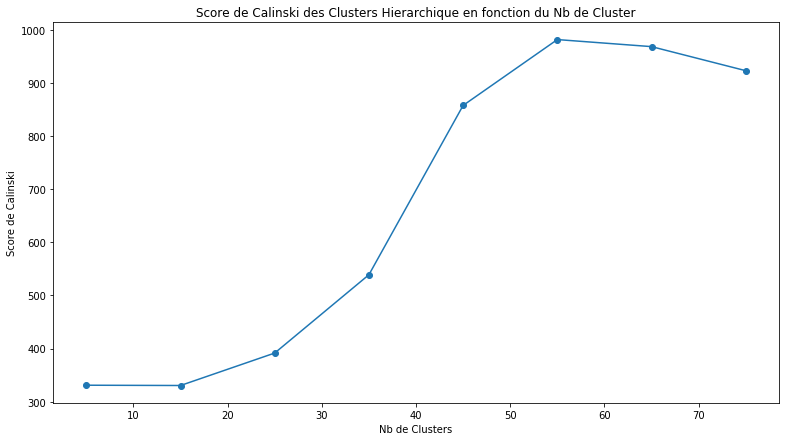

In [39]:
plt.figure(figsize=(13,7))

plt.title('Score de Calinski des Clusters Hierarchique en fonction du Nb de Cluster')
plt.ylabel("Score de Calinski")
plt.xlabel("Nb de Clusters")

plt.plot(range(5,80, 10), calinski, marker='o')

In [40]:
test = max(calinski)
test

981.3481018001625

### Best Clustering y tfidf

In [41]:
cls_cah_ok2 = cluster.AgglomerativeClustering(n_clusters=35, 
                                affinity='euclidean', 
                                memory=None, 
                                connectivity=None, 
                                compute_full_tree='auto', 
                                linkage='ward' 
                                )

cls_cah_ok2.fit(y_tfidf_scaled)

y_tfidf_clus_cah = cls_cah_ok2.labels_
y_tfidf_clus_cah

array([ 0,  4,  2, ..., 20,  3, 17])

In [42]:
cali2 = metrics.calinski_harabaz_score(y_tfidf_scaled, cls_cah_ok2.labels_)
cali2

538.8430424030591

In [43]:
test = pd.DataFrame(y_tfidf_clus_cah)
test.describe()

,0
count,8000.000000
mean,9.179250
std,10.717858
min,0.000000
25%,0.000000
50%,4.000000
75%,16.000000
max,34.000000


In [44]:
data_text['y tfidf Cluster'] = y_tfidf_clus_cah
data_text.head()

,Text_OK,Tags_OK,Tags_OK_Freq,X Freq Cluster,X TFIDF Cluster,y Freq Cluster,y tfidf Cluster
0,want use track bar change form opacity code de...,c# floating-point type-conversion double ...,,0,6,0,0
1,absolutely positioned div containing several c...,html css css3 internet-explorer-7,html css,9,6,12,4
2,given datetime representing person birthday ca...,c# .net datetime,,2,6,0,2
3,given specific datetime value display relative...,c# datetime time datediff relative-time-s...,,2,1,0,0
4,standard way web server able determine user ti...,javascript html browser timezone timezone...,javascript html,2,6,0,4


## Clustering Synthesis

<span><table class="wikitable">
<tr>
<th>Clustering</th>
<th>Calinski</th>
<th>Parameters</th>    
<th>Interest</th>
</tr>
<tr>
<td>kmeans + X Freq</td>
<td>738</td>
<td>n = 30</td>
<td>-</td>
</tr>
<tr>
<td>kmeans + X tfidf </td>
<td>1126</td>
<td>n = 60</td>    
<td>+</td>
</tr>
<tr>
<td>kmeans + y Freq</td>
<td>63</td>
<td>n = 10</td>
<td>-</td>
</tr>
<tr>
<td>kmeans + y tfidf </td>
<td>69.17</td>
<td>n = 1900</td>    
<td>-</td>
</tr>
<tr>
<td>CAH + X Freq</td>
<td>1209</td>
<td>n = 34</td>
<td>++</td>
</tr>
<tr>
<td>CAH + X tfidf</td>
<td>2053</td>
<td>n =  34</td>
<td>++</td>
</tr>
<tr>
<td>CAH + y Freq</td>
<td>93.8</td>
<td>n = 190</td>
<td>+</td>
</tr>
<tr>
<td>CAH + y tfidf</td>
<td>96.7</td>
<td>n = 190</td>
<td>++</td>
</tr>
</table>

<span style="color:#3366ff"> CAH best clustering

In [45]:
data_text_nonan = data_text.loc[data_text.Tags_OK_Freq.str.len()>0]

data_text_nonan = pd.DataFrame(data_text_nonan , columns = ['Text_OK',
                                                            'y tfidf Cluster',
                                                            'y Freq Cluster',
                                                            'Tags_OK_Freq']).reset_index()
data_text_nonan.head(15)

,index,Text_OK,y tfidf Cluster,y Freq Cluster,Tags_OK_Freq
0,1,absolutely positioned div containing several c...,4,12,html css
1,4,standard way web server able determine user ti...,4,0,javascript html
2,6,expose linq query asmx web service usually bus...,8,4,linq
3,7,store binary data mysql,10,15,mysql database
4,8,looking fastest way obtain value personal chal...,15,9,performance algorithm
5,9,trigger update table throw error prevents mysql,27,28,mysql database
6,12,monitor sql server database changes table with...,16,1,sql
7,14,starting new web application php time around w...,0,0,php
8,15,let say create wizard html form one button goe...,4,0,html
9,16,datatable name column want generate collection...,30,14,linq


In [46]:
data_text_engine_FULL = data_text_nonan.filter(items=(['Text_OK',
                                                 #'Tags_OK',
                                                 'y tfidf Cluster',
                                                 'y Freq Cluster', 
                                                 'Tags_OK_Freq'
                                                 #'y tfidf Cluster alt'
                                                ]))

data_text_engine_FULL.to_csv(path_or_buf='DATA_clean/20180925_sansdouble_data_OK_10000_Clus_tfidf_LDA_OK.csv',
                             index=True)

# <span style="color:#6600cc"> MACHINE LEARNING - - - - - - - - - - - - - - - - - 

### Preprocessing

<strong> X Freq

In [47]:
scaler_text = preprocessing.StandardScaler().fit(X_f)
X_f_scaled = scaler_text.transform(X_f) 
X_f_scaled.shape

(8000, 400)

<strong> X tfidf

In [48]:
scaler_text = preprocessing.StandardScaler().fit(X_tfidf)
X_tfidf_scaled = scaler_text.transform(X_tfidf) 
X_tfidf_scaled.shape

(8000, 400)

<strong> Clusters X Freq

Best clustering

In [49]:
X_f_rav = X_f_clus_cah.ravel()
X_f_rav

array([0, 9, 2, ..., 0, 1, 0])

<strong> Clusters X tfidf

Best clustering

In [50]:
X_tfidf_rav = X_tfidf_clus_cah.ravel()
X_tfidf_rav

array([6, 6, 6, ..., 6, 0, 0])

# -

<strong> y clusters on Freq

Best clustering

In [51]:
y_rav = y_f_clus_cah.ravel()
y_rav

array([ 0, 12,  0, ..., 17,  3, 32])

<strong> y clusters on TF-IDF

Best clustering

In [52]:
y_tfidf_rav = y_tfidf_clus_cah.ravel()
y_tfidf_rav

array([ 0,  4,  2, ..., 20,  3, 17])

test with y_tfidf_clus_cah_alt

# 1) SUPERVISED ML: Classifier kNN

## kNN: X_tfidf & Cluster y_tfidf

<strong> Add column of 1

In [53]:
xones = np.ones(X_tfidf_scaled.shape[0])
xones = pd.DataFrame(xones)

X_tfidf_scaled = pd.DataFrame(X_tfidf_scaled)

X_tfidf = pd.concat([xones, X_tfidf_scaled], axis = 1)
X_tfidf.head()

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,1.0,-0.294765,-0.234881,-0.154689,-0.216885,-0.259508,-0.154338,-0.145977,-0.173205,-0.190853,-0.351418,-0.191587,-0.252618,-0.210156,-0.138968,-0.14112,-0.373082,-0.21945,-0.155255,-0.251854,2.501486,-0.191141,-0.161664,-0.206047,-0.140921,-0.265769,-0.143973,-0.199939,-0.143437,-0.233027,-0.137362,-0.223329,-0.13705,-0.153555,-0.367178,-0.274302,-0.216416,-0.15162,-0.169169,5.305473,-0.140169,-0.163597,-0.140274,-0.233867,-0.170834,-0.139352,-0.21154,-0.147409,4.796654,-0.171127,-0.184099,-0.288883,-0.170542,-0.148382,-0.202616,-0.142055,-0.208899,-0.166445,-0.191042,-0.145454,-0.137711,-0.148437,-0.159542,3.924684,-0.149508,5.935936,-0.151551,-0.161812,-0.33726,-0.296371,-0.190633,-0.189192,-0.140137,-0.215769,-0.240457,-0.175123,-0.343202,-0.297533,-0.154025,-0.183677,-0.164942,-0.139629,-0.155204,-0.204603,-0.139856,-0.273753,-0.163544,-0.175953,-0.149308,-0.227702,-0.14217,-0.200122,-0.279816,-0.196679,-0.20774,-0.221347,-0.163454,-0.161561,4.214592,-0.268769,-0.258459,-0.161889,-0.210383,-0.165548,-0.320482,-0.140876,-0.168022,-0.146379,-0.184592,-0.193886,-0.153447,-0.143666,-0.36244,-0.287733,-0.337022,6.261564,-0.266799,3.940739,-0.144262,5.276634,-0.1519,-0.149248,-0.26399,-0.19087,-0.154933,-0.149024,-0.259172,-0.143999,-0.142219,-0.14503,-0.160479,-0.144985,-0.219316,-0.163242,-0.184647,-0.237573,-0.202565,-0.331934,-0.168095,-0.197515,-0.177892,-0.173752,-0.142381,-0.228066,-0.309008,-0.215981,-0.221521,-0.207554,-0.190005,-0.196309,-0.159428,-0.140694,-0.175874,-0.154406,-0.211734,-0.160413,-0.149213,-0.145649,-0.169962,-0.204729,-0.187638,-0.155396,-0.159359,-0.169997,-0.150408,-0.14122,-0.257175,-0.206864,-0.181836,-0.171712,-0.181987,-0.191515,-0.179434,-0.159577,-0.158716,-0.188736,-0.146245,-0.148073,-0.209204,-0.226771,-0.15732,-0.168455,-0.242608,-0.182035,-0.17778,-0.158107,-0.151303,-0.183005,-0.192548,-0.312709,-0.180592,-0.200776,-0.185366,-0.145342,-0.180402,-0.31976,-0.15514,-0.144188,-0.225605,-0.200056,-0.163053,-0.134218,-0.144743,-0.153476,-0.176335,-0.269274,-0.172478,-0.176013,-0.215671,-0.164560,-0.141548,-0.245906,-0.192311,-0.179742,-0.140046,-0.263085,-0.139313,-0.182111,-0.177564,-0.366284,-0.154149,-0.150924,-0.164098,-0.161868,-0.153142,-0.221323,-0.264353,-0.17553,-0.139858,-0.145053,-0.147653,-0.216568,-0.16813,-0.154449,-0.175235,-0.156681,-0.168193,-0.277348,-0.153443,-0.200222,-0.166124,-0.15985,-0.212269,-0.175508,-0.207488,-0.159738,-0.142816,-0.171375,-0.208592,-0.296012,-0.17944,-0.166289,-0.147991,-0.163643,-0.

# 2) SUPERVISED ML: Classifier Random Forest

## Random Forest: X_f & Cluster y_f

In [54]:
rfcCV = RandomForestClassifier()

parameters = {
              'n_estimators': [5, 10, 50], #, 100], #, 150, 200, 250, 300],
              'max_depth':range(3,6)
             }

clf = GridSearchCV(rfcCV, parameters, n_jobs=4, cv=10)
clf.fit(X_f_scaled, y_rav)

print ("The RFC + CV Accuracy is:",
    (clf.best_score_*100), 
      "% with parameters:", 
    clf.best_params_) 

The RFC + CV Accuracy is: 47.362500000000004 % with parameters: {'max_depth': 5, 'n_estimators': 5}


##  Random Forest: X_tfidf &  Cluster y_tfidf

In [55]:
rfcCV = RandomForestClassifier()

parameters = {
              'n_estimators': [5, 10, 50],#, 100, 150, 200, 250, 300],
              'max_depth':range(3,6)
             }

clf = GridSearchCV(rfcCV, parameters, n_jobs=4, cv=10)
clf.fit(X_tfidf_scaled, y_tfidf_rav)

print ("The RFC + CV Accuracy is:",
    (clf.best_score_*100), 
      "% with parameters:", 
    clf.best_params_) 

The RFC + CV Accuracy is: 35.9875 % with parameters: {'max_depth': 5, 'n_estimators': 5}


##  Random Forest: X_f &  Cluster y_tfidf

In [56]:
rfcCV = RandomForestClassifier()

parameters = {
              'n_estimators': [5, 10, 50],#, 100, 150, 200, 250, 300],
              'max_depth':range(3,6)
             }

clf = GridSearchCV(rfcCV, parameters, n_jobs=4, cv=10)
clf.fit(X_f_scaled, y_tfidf_rav)

print ("The RFC + CV Accuracy is:",
    (clf.best_score_*100), 
      "% with parameters:", 
    clf.best_params_) 

The RFC + CV Accuracy is: 36.9625 % with parameters: {'max_depth': 5, 'n_estimators': 5}


## <span style="color:#ff0000"> !! Random Forest: X_tfidf & Cluster y_f !!

In [57]:
rfcCV20 = RandomForestClassifier()

parameters = {
              'n_estimators': [3,4,5, 10, 50],#, 100, 150, 200, 250, 300],
              'max_depth':range(3,7)
             }

clf20 = GridSearchCV(rfcCV20, parameters, n_jobs=4, cv=10)
clf20.fit(X_tfidf_scaled, y_rav)

print ("The RFC + CV Accuracy is:",
    (clf20.best_score_*100), 
      "% with parameters:", 
    clf20.best_params_) 

The RFC + CV Accuracy is: 47.599999999999994 % with parameters: {'max_depth': 6, 'n_estimators': 3}


## Random Forest: Cluster X_f & Cluster y_f

In [58]:
rfcCV3 = RandomForestClassifier()

parameters = {
              'n_estimators': [1,2,3,4,5, 10], #, 50] #, 100, 150, 200, 250, 300],
              'max_depth':range(2,6)
             }

clf3 = GridSearchCV(rfcCV3, parameters, n_jobs=4, cv=10)
clf3.fit(X_f_rav.reshape(-1, 1), y_rav)

print ("The RFC + CV Accuracy is:",
    (clf.best_score_*100), 
      "% with parameters:", 
    clf.best_params_) 

The RFC + CV Accuracy is: 36.9625 % with parameters: {'max_depth': 5, 'n_estimators': 5}


## Random Forest: Cluster X_tfidf & Cluster y_tfidf

rfcCV4 = RandomForestClassifier()

parameters = {
              'n_estimators': [1,2,3,4,5, 10], #, 50] #, 100, 150, 200, 250, 300],
              'max_depth':range(2,6)
             }

clf4 = GridSearchCV(rfcCV4, parameters, n_jobs=4, cv=10)
clf4.fit(X_tfidf_rav.reshape(-1, 1), y_tfidf_rav)

print ("The RFC + CV Accuracy is:",
    (clf.best_score_*100), 
      "% with parameters:", 
    clf.best_params_) 

# 3) ML: Neural Network

<strong> X f / y f clustered

In [59]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_f_scaled, y_rav, test_size=0.2)

In [60]:
neur0 = MLPClassifier(hidden_layer_sizes=(100, 50),
                     activation ='logistic',
                     solver='adam',
                     alpha=1e-5,
                     random_state=1)

In [61]:
neur0.fit(X_train0, y_train0)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [62]:
scoreneur0 = neur0.score(X_test0, y_test0)
print("Score = ",scoreneur0*100,"%.")

Score =  43.625 %.


<strong> X tfidf clustered / y tfidf clustered

In [63]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tfidf_rav, y_tfidf_rav, test_size=0.2)

In [64]:
neur2 = MLPClassifier(hidden_layer_sizes=(30, 30),
                     activation ='logistic',
                     solver='adam',
                     alpha=1e-5,
                     random_state=1)

In [65]:
neur2.fit(X_train2.reshape(-1, 1), y_train2.reshape(-1, 1))

scoreneur2 = neur2.score(X_train2.reshape(-1, 1), y_train2.reshape(-1, 1))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
print ("Score =", scoreneur2*100, "%.")

Score = 34.515625 %.


# 3) UNSUPERVISED ML: LDA

In [67]:
n_top_words = 5

In [68]:
def print_top_words(model, feature_names, n_top_words):
    topi=[]
    tags_lda=[]
    for topic_idx, topic in enumerate(model.components_):
        topi.append("Topic #%d:" % topic_idx)
        tags_lda.append(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])) 
    test = pd.DataFrame(tags_lda, index=topi, columns=['LDA Tags'])
    return(test)

## LDA X freq

n components = 1000

lda0 = LatentDirichletAllocation(n_components=1000, 
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50,
                                random_state=0)

#lda0.fit(y_tag_counts.toarray())
lda0.fit(X_text_counts.toarray())

#tf_feature_names = count_vect2.get_feature_names()
tf_feature_names = count_vect.get_feature_names()

table_tags_f1000= print_top_words(lda0, tf_feature_names, n_top_words)
table_tags_f1000.head()

n components = 200

lda = LatentDirichletAllocation(n_components=200, 
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50,
                                random_state=0)

#lda.fit(y_tag_counts.toarray())
lda.fit(X_text_counts.toarray())

#tf_feature_names = count_vect2.get_feature_names()
tf_feature_names = count_vect.get_feature_names()

table_tags_f200= print_top_words(lda, tf_feature_names, n_top_words)
table_tags_f200.head()

n components = 100

lda2 = LatentDirichletAllocation(n_components=100, 
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50,
                                random_state=0)

#lda2.fit(y_tag_counts.toarray())
lda2.fit(X_text_counts.toarray())

#tf_feature_names = count_vect2.get_feature_names()
tf_feature_names = count_vect.get_feature_names()

table_tags_f100= print_top_words(lda2, tf_feature_names, n_top_words)
table_tags_f100.head()

### LDA X tfidf

n components = 1000

lda33 = LatentDirichletAllocation(n_components=1000, 
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

#lda33.fit(values_y_tfidf2.toarray())
lda33.fit(values_X_tfidf.toarray())

#tf_feature_names2 = tfidf2.get_feature_names()
tf_feature_names2 = tfidf.get_feature_names()

table_tags_tfidf1000 = print_top_words(lda33, tf_feature_names2, n_top_words)
table_tags_tfidf1000.head()

n components = 200

lda3 = LatentDirichletAllocation(n_components=200, 
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

#lda3.fit(values_y_tfidf2.toarray())
lda3.fit(values_X_tfidf.toarray())

#tf_feature_names2 = tfidf2.get_feature_names()
tf_feature_names2 = tfidf.get_feature_names()

table_tags_tfidf200 = print_top_words(lda3, tf_feature_names2, n_top_words)
table_tags_tfidf200.head()

n components = 100

lda4 = LatentDirichletAllocation(n_components=100, 
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50,
                                random_state=0)

#lda4.fit(values_y_tfidf2.toarray())
lda4.fit(values_X_tfidf.toarray())

#tf_feature_names2 = tfidf2.get_feature_names()
tf_feature_names2 = tfidf.get_feature_names()

table_tags_tfidf100 = print_top_words(lda4, tf_feature_names2, n_top_words)
table_tags_tfidf100.head()

n components = 50

lda6 = LatentDirichletAllocation(n_components=50, 
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

#lda6.fit(values_y_tfidf2.toarray())
lda6.fit(values_X_tfidf.toarray())

#tf_feature_names2 = tfidf2.get_feature_names()
tf_feature_names2 = tfidf.get_feature_names()

table_tags_tfidf50 = print_top_words(lda6, tf_feature_names2, n_top_words)
table_tags_tfidf50.head()

# <span style="color:#6600cc"> Machine Learning Synthesis

<span><table class="wikitable">
<tr>
<th>ML</th>
<th>Accuracy</th>
<th>Parameters</th>    
<th>Interest</th>
</tr>
<tr>
<td>kNN + Freq</td>
<td>XX</td>
<td>k = </td>
<td>+</td>
</tr>
<tr>
<td>kNN + TFIDF</td>
<td>XX</td>
<td>k = </td>
<td>+</td>
</tr>
<tr>
<td>Random Forest + Freq</td>
<td>XX</td>
<td>n =  <br>depth = </td>
<td>+</td>
</tr>
<tr>
<td>Random Forest + TFIDF</td>
<td>XX</td>
<td>n =  <br>depth = </td>
<td>+</td>
</tr>
<tr>
<td>Neural Network</td>
<td>XX</td>
<td>a = </td>     
<td>+</td>
</tr>
</table>

<span style="color:#3366ff"> 

 # <span style="color:#6600cc"> Engine Prediction

In [69]:
# values from X tfidf :
voca = tfidf.vocabulary_
#voca

In [70]:
def unique(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    koo = ' / '.join(ulist)
    return koo

def predi_tag(words_ok):
    # FIT TFIDF
    # with tfidf already done on train set
    question_tfidf_ = tfidf.transform(words_ok)
    question_tfidf = pd.DataFrame(question_tfidf_.toarray(), columns = [tfidf.get_feature_names()])
         
    # Random Forest to predict y Cluster   
    rfcCV = RandomForestClassifier(n_estimators=4,
                                   max_depth=5)
    rfcCV.fit(X_tfidf_scaled, data_text['y tfidf Cluster'])
    
    # PREDICT
    # On determine a quel cluster il appartient
    Cluster_tags_predit  = rfcCV.predict(question_tfidf)
    Cluster_tags_predit  = Cluster_tags_predit[0]

    tags_cluster = data_text[data_text['y tfidf Cluster'] == Cluster_tags_predit]
    tags_cluster = tags_cluster.dropna(axis=0)
    # !!!
    recom = tags_cluster.sample(5)  
    #recom = tags_cluster
    tags_unprocessed = " ".join(recom['Tags_OK'].values)
    tags_recom = unique(tags_unprocessed.split())

    return tags_recom

In [71]:
def predi_tag(words_ok):
    # FIT TFIDF
    # with tfidf already done on train set
    question_tfidf_ = tfidf.transform(words_ok)
    question_tfidf = pd.DataFrame(question_tfidf_.toarray(), columns = [tfidf.get_feature_names()])
    
    # PREDICT
    # On determine a quel cluster il appartient
    Cluster_tags_predit  = rfcCV.predict(question_tfidf)
    Cluster_tags_predit  = Cluster_tags_predit[0] 
   
    tags_cluster = data_text[data_text['y Freq Cluster'] == Cluster_tags_predit]
    tags_cluster = tags_cluster.dropna(axis=0)
    
    # !!! aaa
    recom = tags_cluster.sample(frac=0.05) 
    
    #Tags_OK_dumm = recom['Tags_OK'].str.get_dummies(sep=' ')
    #Tags_OK_dumm = tags_cluster['Tags_OK'].str.get_dummies(sep=' ')   
    #sum_tags = Tags_OK_dumm.sum().sort_values(ascending=False)
    #sum_tags = pd.DataFrame(sum_tags)
    #sum_tags = sum_tags.head(9)
    
    #tags_unprocessed = " ".join(sum_tags.index)
    
    #recom = tags_cluster
    tags_unprocessed = " ".join(recom['Tags_OK_Freq'].values)
    tags_recom = unique(tags_unprocessed.split())

    return tags_recom

In [72]:
def pos(x):
    ligne = []
    if isinstance(x, str):
        u = word_tokenize(x)
        kkk = nltk.pos_tag(u)
        tt = [w for w,x in kkk if x =='NN' or x =='NNS']
        ttt = " ".join(tt)
        tttt = unique(ttt.split())
        if not tttt:
            tttt = 'Not enough words for Tagging'
    else:
        ttt = 'No POS'
    return ttt

In [73]:
def func_pred(question):
    words_ok = [x for x in voca.keys() if x in question]
    #test = str(words_ok)
    if not words_ok:
        result = pos(question)
        result = str(result)
        #result = "POS TAGGING TAGS GENERATION: " + result #+ test
    else:
        result = predi_tag(words_ok)
        result = str(result)
        #result = "TAGS PREDICTED with X_TFIDF/CAH: " + result
    
    return result

# COMPARISON: SUPERVISED / UNSUPERVISED

In [74]:
# Random Forest to predict y Cluster   
rfcCV = RandomForestClassifier(n_estimators=5,max_depth=4)
rfcCV.fit(X_tfidf_scaled, data_text['y Freq Cluster'])   

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
# data_TEST
data_test['Tags Pred'] = [func_pred(x.split()) for x in data_test['Text_OK']]

In [76]:
data_test = data_test.reset_index(drop=True)

In [77]:
data_test_1000 = data_test[0:5000]
data_test_1000.head()

,Text_OK,Tags_OK,Tags Pred
0,biggest concern ease use nothing beats google ...,project-management scheduling project-plann...,html / javascript / php / python / windows / t...
1,recently installed windows server replace cras...,iis iis-7 asp-classic,html / javascript / sql / python / php / windo...
2,gnuplot docs say fonts five basic supported di...,gnuplot,sql / php / javascript / python / testing / ja...
3,security manager dynamically inserts bit javas...,html doctype,php / windows / javascript / python / html / j...
4,need good cms supports data clustering managin...,content-management-system cluster-computing,javascript / java / html / php / sql / windows...


In [78]:
data2 = [" ".join(tok(x)) for x in data_test_1000['Tags_OK'] ]
data_t2 = pd.DataFrame(data2, columns = ['Tags_OK_Freq'])
data_test_1000 = pd.concat([data_test_1000, data_t2['Tags_OK_Freq']], axis = 1)
data_test_1000.head(10)

,Text_OK,Tags_OK,Tags Pred,Tags_OK_Freq
0,biggest concern ease use nothing beats google ...,project-management scheduling project-plann...,html / javascript / php / python / windows / t...,
1,recently installed windows server replace cras...,iis iis-7 asp-classic,html / javascript / sql / python / php / windo...,iis
2,gnuplot docs say fonts five basic supported di...,gnuplot,sql / php / javascript / python / testing / ja...,
3,security manager dynamically inserts bit javas...,html doctype,php / windows / javascript / python / html / j...,html
4,need good cms supports data clustering managin...,content-management-system cluster-computing,javascript / java / html / php / sql / windows...,
5,admit always forgot syntactical intracacies na...,ant nant,python / javascript / sql / php / ruby / html ...,
6,seen weird behavior several sites recently scr...,html browser-history,sql / windows / javascript / python / php / ru...,html
7,anybody useful example assignment inside c met...,c# language-features,php / sql / javascript / python / windows / te...,
8,good idea use factory methods within object in...,design-patterns factory factory-pattern fa...,ruby / html / python / php / sql / windows / j...,
9,besides ld preload trick linux kernel modules ...,c linux redirect hook system-calls,php / java / windows / javascript / sql / pyth...,linux


In [79]:
data_test_1000_drop = data_test_1000.loc[data_test_1000.Tags_OK_Freq.str.len()>0]

data_test_1000_drop = pd.DataFrame(data_test_1000_drop , columns = ['Text_OK','Tags_OK_Freq','Tags Pred']).reset_index()
data_test_1000_drop = data_test_1000_drop.filter(items=(['Text_OK','Tags_OK_Freq', 'Tags Pred']))
data_test_1000_drop.head(15)

,Text_OK,Tags_OK_Freq,Tags Pred
0,recently installed windows server replace cras...,iis,html / javascript / sql / python / php / windo...
1,security manager dynamically inserts bit javas...,html,php / windows / javascript / python / html / j...
2,seen weird behavior several sites recently scr...,html,sql / windows / javascript / python / php / ru...
3,besides ld preload trick linux kernel modules ...,linux,php / java / windows / javascript / sql / pyth...
4,noted differences appearance rendering html xh...,html,javascript / python / java / html / windows / ...
5,graphing mean bar charts pie line graphs sort ...,winforms,php / javascript / python / html / database / ...
6,reason browsers correctly recognize script src...,javascript html,php / javascript / html / python / windows / s...
7,jsf application converting use webservices ins...,java,java / windows / sql / php / python / javascri...
8,problem huge number legacy stored procedures w...,database,java / html / windows / python / sql / javascr...
9,domain logic implemented number pojos want wri...,java,ruby / html / java / windows / python / javasc...


In [80]:
data_test_1000_drop.shape

(961, 3)

In [81]:
data_test_1000_drop['Tags Pred']

0      html / javascript / sql / python / php / windo...
1      php / windows / javascript / python / html / j...
2      sql / windows / javascript / python / php / ru...
3      php / java / windows / javascript / sql / pyth...
4      javascript / python / java / html / windows / ...
5      php / javascript / python / html / database / ...
6      php / javascript / html / python / windows / s...
7      java / windows / sql / php / python / javascri...
8      java / html / windows / python / sql / javascr...
9      ruby / html / java / windows / python / javasc...
10     windows / python / ruby / javascript / php / h...
11     javascript / html / java / testing / python / ...
12     windows / testing / javascript / php / python ...
13     php / javascript / html / ruby / python / wind...
14     python / php / javascript / sql / windows / te...
15     windows / javascript / php / python / sql / ru...
16     javascript / html / php / ruby / performance /...
17     php / javascript / sql /

<strong> lda 1000 y Freq

In [82]:
f_test = CountVectorizer(max_features = 400, 
                         max_df = 1300,
                         min_df=150)

values_X_f_test = f_test.fit_transform(data_test_1000_drop['Text_OK'])

lda_f_test_1000 = LatentDirichletAllocation(n_components=1000, 
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda_f_test_1000.fit(values_X_f_test.toarray())

tf_feature_names_test = f_test.get_feature_names()
table_tags_f_test_1000 = print_top_words(lda_f_test_1000, tf_feature_names_test, n_top_words)
table_tags_f_test_1000.head()

,LDA Tags
Topic #0:,get application want need use
Topic #1:,code java know one use
Topic #2:,would way like java know
Topic #3:,would using need one code
Topic #4:,use like using way code


<strong> lda 1000 y TFIDF

In [83]:
tfidf_test = TfidfVectorizer(max_features = 400, 
                             max_df = 1300,
                             min_df = 150)

values_X_tfidf_test = tfidf_test.fit_transform(data_test_1000_drop['Text_OK'])

lda_tfidf_test_1000 = LatentDirichletAllocation(n_components=1000, 
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda_tfidf_test_1000.fit(values_X_tfidf_test.toarray())

tf_feature_names_test = tfidf_test.get_feature_names()
table_tags_tfidf_test_1000 = print_top_words(lda_tfidf_test_1000, tf_feature_names_test, n_top_words)
table_tags_tfidf_test_1000.head()

,LDA Tags
Topic #0:,get application want need use
Topic #1:,code java know one use
Topic #2:,would way like java know
Topic #3:,would using need one code
Topic #4:,use like using way code


In [84]:
def compa(x,y):
    compa = (set(x.split()) & set(y.split()))
    return compa

In [85]:
data_test_1000_drop['match_LDA_f_1000']= [compa(x,y) for (x,y) in zip(data_test_1000_drop['Tags_OK_Freq'], 
                                                                 table_tags_tfidf_test_1000['LDA Tags'])]

data_test_1000_drop['match_LDA_tfidf_1000']= [compa(x,y) for (x,y) in zip(data_test_1000_drop['Tags_OK_Freq'], 
                                                                     table_tags_tfidf_test_1000['LDA Tags'])]

data_test_1000_drop['match_supervised']= [compa(x,y) for (x,y) in zip(data_test_1000_drop['Tags_OK_Freq'], 
                                                                 data_test_1000_drop['Tags Pred'])]

data_test_1000_drop.head(20)

,Text_OK,Tags_OK_Freq,Tags Pred,match_LDA_f_1000,match_LDA_tfidf_1000,match_supervised
0,recently installed windows server replace cras...,iis,html / javascript / sql / python / php / windo...,{},{},{}
1,security manager dynamically inserts bit javas...,html,php / windows / javascript / python / html / j...,{},{},{html}
2,seen weird behavior several sites recently scr...,html,sql / windows / javascript / python / php / ru...,{},{},{html}
3,besides ld preload trick linux kernel modules ...,linux,php / java / windows / javascript / sql / pyth...,{},{},{}
4,noted differences appearance rendering html xh...,html,javascript / python / java / html / windows / ...,{},{},{html}
5,graphing mean bar charts pie line graphs sort ...,winforms,php / javascript / python / html / database / ...,{},{},{}
6,reason browsers correctly recognize script src...,javascript html,php / javascript / html / python / windows / s...,{},{},"{html, javascript}"
7,jsf application converting use webservices ins...,java,java / windows / sql / php / python / javascri...,{java},{java},{java}
8,problem huge number legacy stored procedures w...,database,java / html / windows / python / sql / javascr...,{},{},{database}
9,domain logic implemented number pojos want wri...,java,ruby / html / java / windows / python / javasc...,{java},{java},{java}


In [86]:
def count_tags(x):
    count = len(x.split())
    return count

In [87]:
def count_match(x):
    count = len(x)
    return count

In [88]:
data_test_1000_drop['Nb Tags_OK'] = [count_tags(x) for x in data_test_1000_drop['Tags_OK_Freq']]

data_test_1000_drop['Nb Sup Match'] = [count_match(x) for x in data_test_1000_drop['match_supervised']]
data_test_1000_drop['Supervised Match Accuracy'] = (data_test_1000_drop['Nb Sup Match'] / data_test_1000_drop['Nb Tags_OK'])*100

data_test_1000_drop['Nb LDA f Match'] = [count_match(x) for x in data_test_1000_drop['match_LDA_f_1000']]
data_test_1000_drop['LDA f Match Accuracy'] = (data_test_1000_drop['Nb LDA f Match'] / data_test_1000_drop['Nb Tags_OK'])*100

data_test_1000_drop['Nb LDA tfidf Match'] = [count_match(x) for x in data_test_1000_drop['match_LDA_tfidf_1000']]
data_test_1000_drop['LDA tfidf Match Accuracy'] = (data_test_1000_drop['Nb LDA tfidf Match'] / data_test_1000_drop['Nb Tags_OK'])*100

data_test_1000_drop.head()

,Text_OK,Tags_OK_Freq,Tags Pred,match_LDA_f_1000,match_LDA_tfidf_1000,match_supervised,Nb Tags_OK,Nb Sup Match,Supervised Match Accuracy,Nb LDA f Match,LDA f Match Accuracy,Nb LDA tfidf Match,LDA tfidf Match Accuracy
0,recently installed windows server replace cras...,iis,html / javascript / sql / python / php / windo...,{},{},{},1,0,0.0,0,0.0,0,0.0
1,security manager dynamically inserts bit javas...,html,php / windows / javascript / python / html / j...,{},{},{html},1,1,100.0,0,0.0,0,0.0
2,seen weird behavior several sites recently scr...,html,sql / windows / javascript / python / php / ru...,{},{},{html},1,1,100.0,0,0.0,0,0.0
3,besides ld preload trick linux kernel modules ...,linux,php / java / windows / javascript / sql / pyth...,{},{},{},1,0,0.0,0,0.0,0,0.0
4,noted differences appearance rendering html xh...,html,javascript / python / java / html / windows / ...,{},{},{html},1,1,100.0,0,0.0,0,0.0


In [89]:
data_test_1000_drop['Supervised Match Accuracy'].mean()

50.9972251127298

In [90]:
data_test_1000_drop['LDA f Match Accuracy'].mean()

7.414151925078043

In [91]:
data_test_1000_drop['LDA tfidf Match Accuracy'].mean()

7.414151925078043

# CONCLUSION

<span style="color:#3366ff"> The supervised model is better .